<a href="https://colab.research.google.com/github/NEHALSMITTAL/aadhaar-enrolment-analysis/blob/main/Aadhar_Enrolement_Anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
To analyse Aadhaar enrolment patterns during 2025 across states and age groups, identify regional and early‑age enrolment gaps, and provide data‑driven insights to support targeted planning and policy interventions by UIDAI.


In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset** **Description**
The analysis uses anonymised Aadhaar enrolment data for 2025, containing state, district, PIN code, date, and age-group wise enrolment counts (0-5, 5-17, and 18+).


The dataset contains district‑ and PIN‑level granularity, enabling further micro‑level analysis if required.

In [390]:
df1 = pd.read_csv("/content/api_data_aadhar_enrolment_0_500000.csv")
df3 = pd.read_csv("/content/api_data_aadhar_enrolment_1000000_1006029.csv")
df2 = pd.read_csv("/content/api_data_aadhar_enrolment_500000_1000000.csv")

df = pd.concat([df1, df2, df3] , ignore_index= True)

### Data Cleaning and Preparation
- Standardised state and UT names to resolve spelling and casing inconsistencies
- Aligned records with post‑2019 administrative boundaries
- Removed invalid or malformed records
- Derived total enrolment and age‑group share metrics


In [391]:
df.shape

(1006029, 7)

In [392]:
df.isna().sum()

,0
date,0
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


In [393]:
df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


In [394]:
df.dtypes

,0
date,object
state,object
district,object
pincode,int64
age_0_5,int64
age_5_17,int64
age_18_greater,int64


In [395]:
df['date'] = pd.to_datetime(df['date'] , errors = 'coerce')
df['year'] = df['date'].dt.year

In [396]:
df['date'].isna().sum()

np.int64(682238)

In [397]:
df_clean = df.dropna(subset=['date', 'state', 'age_0_5', 'age_5_17', 'age_18_greater']).copy()

In [398]:
df.shape

(1006029, 8)

In [399]:
df_clean['year'] = df_clean['date'].dt.year
df_clean['total_enrolment'] = (df_clean['age_0_5'] + df_clean['age_5_17'] + df_clean['age_18_greater'] )

In [400]:
yearly = (df_clean.groupby('year')['total_enrolment'].sum().reset_index().sort_values('year'))

In [401]:
df_clean['date'].nunique()
df_clean['date'].min(), df_clean['date'].max()

(Timestamp('2025-01-04 00:00:00'), Timestamp('2025-12-11 00:00:00'))

In [402]:
df_clean['state'] = (df_clean['state'].astype(str).str.strip().str.lower())

In [403]:
official_states = [
    'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
    'chhattisgarh', 'goa', 'gujarat', 'haryana',
    'himachal pradesh', 'jharkhand', 'karnataka', 'kerala',
    'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya',
    'mizoram', 'nagaland', 'odisha', 'punjab', 'rajasthan',
    'sikkim', 'tamil nadu', 'telangana', 'tripura',
    'uttar pradesh', 'uttarakhand', 'west bengal',
    'andaman and nicobar islands', 'chandigarh',
    'dadra and nagar haveli', 'daman and diu',
    'delhi', 'jammu and kashmir', 'ladakh',
    'lakshadweep', 'puducherry'
]


In [404]:
from difflib import get_close_matches
def standardize_state(state):
  match = get_close_matches(state, official_states, n=1, cutoff=0.8)
  return match[0] if match else state

df_clean['state'] = df_clean['state'].apply(standardize_state)



In [405]:
df_clean['state'] = df_clean['state'].str.title()

In [406]:
df_clean['state'].value_counts().head(20)

,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [407]:
df_clean['state'].value_counts().tail(20)

,count
state,
Meghalaya,1375
Tripura,1280
Orissa,1050
Manipur,1022
Nagaland,667
Arunachal Pradesh,546
Goa,498
Mizoram,473
Sikkim,383


In [408]:
df_clean['state'].value_counts()


,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [409]:
df_clean['state'] = (df_clean['state'].astype(str).str.lower().str.strip())


In [410]:
state_corrections = {
    # West Bengal variants
    'west bangal': 'west bengal',
    'westbengal': 'west bengal',

    # Puducherry
    'pondicherry': 'puducherry',

    # Dadra & Nagar Haveli + Daman & Diu (MERGED UT)
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'the dadra and nagar haveli and daman and diu': 'dadra and nagar haveli and daman and diu',

    # Odisha
    'orissa': 'odisha'
}


In [411]:
df_clean['state'] = df_clean['state'].replace(state_corrections)

In [412]:
df_clean['state'] = df_clean['state'].str.title()

In [413]:
df_clean['state'].value_counts()

,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [414]:
df_clean[df_clean['state'].str.isnumeric()]


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,total_enrolment
23108,2025-02-09,100000,100000,100000,0,0,3,2025,3
46946,2025-03-09,100000,100000,100000,0,0,1,2025,1
97816,2025-08-09,100000,100000,100000,0,0,1,2025,1
115798,2025-09-09,100000,100000,100000,0,0,1,2025,1
153156,2025-11-09,100000,100000,100000,0,0,2,2025,2
160195,2025-12-09,100000,100000,100000,0,0,2,2025,2


In [415]:
df_clean[~df_clean['state'].str.contains('[a-zA-Z]', regex=True)]


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,total_enrolment
23108,2025-02-09,100000,100000,100000,0,0,3,2025,3
46946,2025-03-09,100000,100000,100000,0,0,1,2025,1
97816,2025-08-09,100000,100000,100000,0,0,1,2025,1
115798,2025-09-09,100000,100000,100000,0,0,1,2025,1
153156,2025-11-09,100000,100000,100000,0,0,2,2025,2
160195,2025-12-09,100000,100000,100000,0,0,2,2025,2


In [416]:
df_clean = df_clean[df_clean['state'].str.contains('[a-zA-Z]', regex=True)].copy()

In [417]:
df_clean['state'].value_counts()

,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [418]:
df_clean['total_enrolment'] = (df_clean['age_0_5'] + df_clean['age_5_17'] + df_clean['age_18_greater'] )
statewise = (df_clean.groupby('state')['total_enrolment'].sum().reset_index().sort_values('total_enrolment', ascending = False))

# STATE‑WISE ANALYSIS

In [419]:
statewise.head(10)

,state,total_enrolment
33,Uttar Pradesh,557687
4,Bihar,302969
19,Madhya Pradesh,232899
20,Maharashtra,172465
10,Gujarat,167099
35,West Bengal,164867
28,Rajasthan,154860
3,Assam,145039
15,Karnataka,97668
22,Meghalaya,94116


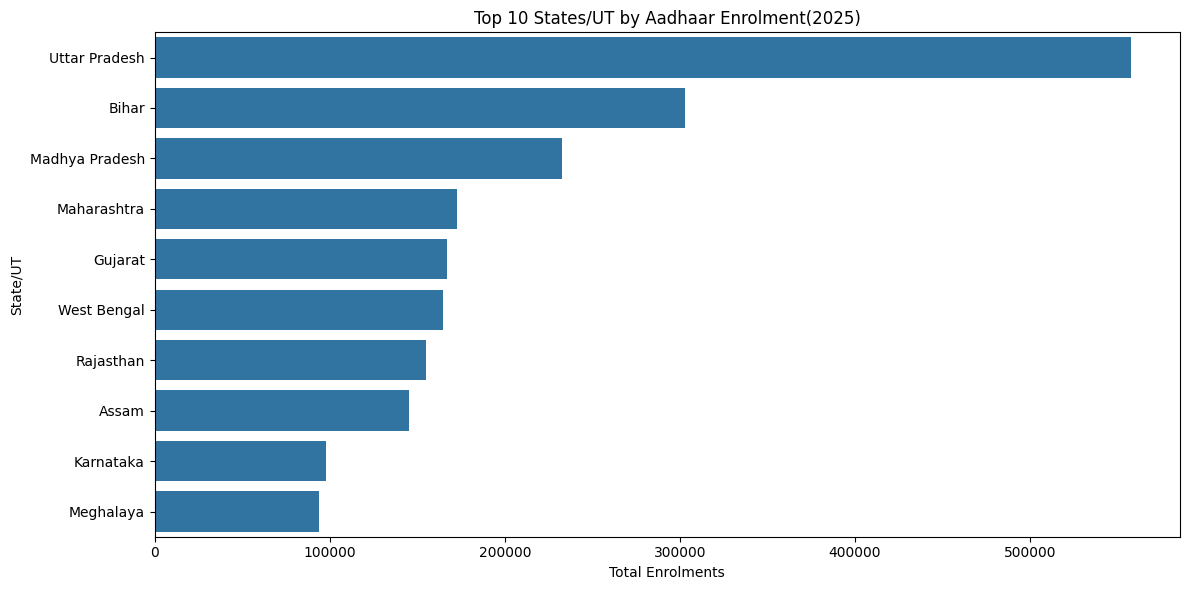

In [420]:
plt.figure(figsize =(12,6))
sns.barplot(data = statewise.head(10),
            x= 'total_enrolment', y= 'state')

plt.title('Top 10 States/UT by Aadhaar Enrolment(2025)')
plt.xlabel('Total Enrolments')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


# **Top 10 States by Aadhaar Enrolment**

**KEY INSIGHTS:**

*   Uttar Pradesh contributes the highest Aadhaar enrolment volume among all states
*   High‑population states such as Bihar, Maharashtra, Madhya Pradesh, and Gujarat dominate total enrolments


*   Aadhaar enrolment volume is strongly influenced by population size and service demand


*   High enrolment volume does not necessarily indicate full coverage or saturation








In [421]:
statewise.tail(10)

,state,total_enrolment
23,Mizoram,3399
2,Arunachal Pradesh,2027
29,Sikkim,1214
26,Puducherry,1175
7,Dadra And Nagar Haveli And Daman And Diu,1074
5,Chandigarh,890
9,Goa,773
17,Ladakh,180
0,Andaman And Nicobar Islands,173
18,Lakshadweep,67


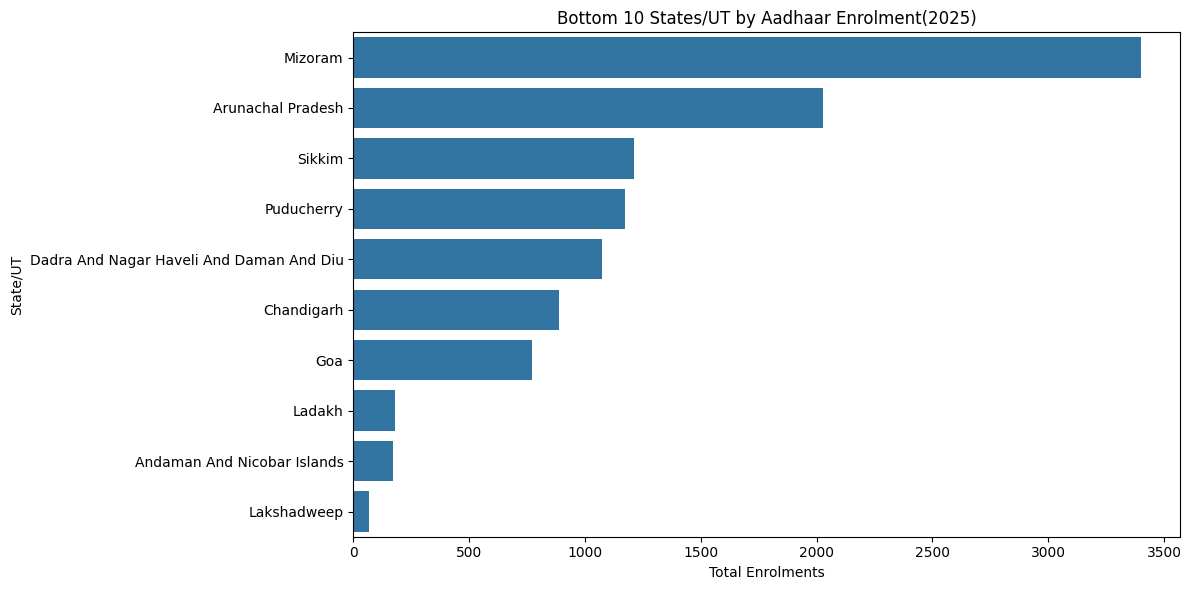

In [422]:
plt.figure(figsize =(12,6))
sns.barplot(data = statewise.tail(10),
            x= 'total_enrolment', y= 'state')

plt.title('Bottom 10 States/UT by Aadhaar Enrolment(2025)')
plt.xlabel('Total Enrolments')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


# **Bottom 10 States / UTs by Aadhaar Enrolment**

**KEY INSIGHTS:**



*   Smaller states and Union Territories show significantly lower enrolment volumes
*   UTs such as Lakshadweep, Ladakh, and Andaman & Nicobar Islands have limited enrolment activity
*   Lower volumes reflect population size, geographic isolation, and accessibility challenges
*   These regions may require customised and region‑specific enrolment strategies




In [423]:
total_national = statewise['total_enrolment'].sum()
statewise['percentage'] = (statewise['total_enrolment']/total_national*100)

statewise[['state' , 'percentage']].head()

,state,percentage
33,Uttar Pradesh,21.140659
4,Bihar,11.484873
19,Madhya Pradesh,8.828677
20,Maharashtra,6.537760
10,Gujarat,6.334347


In [424]:
top5 = statewise.head(5).copy()
others_sum = statewise.iloc[5:]['total_enrolment'].sum()

top5 = pd.concat([ top5, pd.DataFrame({'state': [' All Other States'], 'total_enrolment': [others_sum]})])

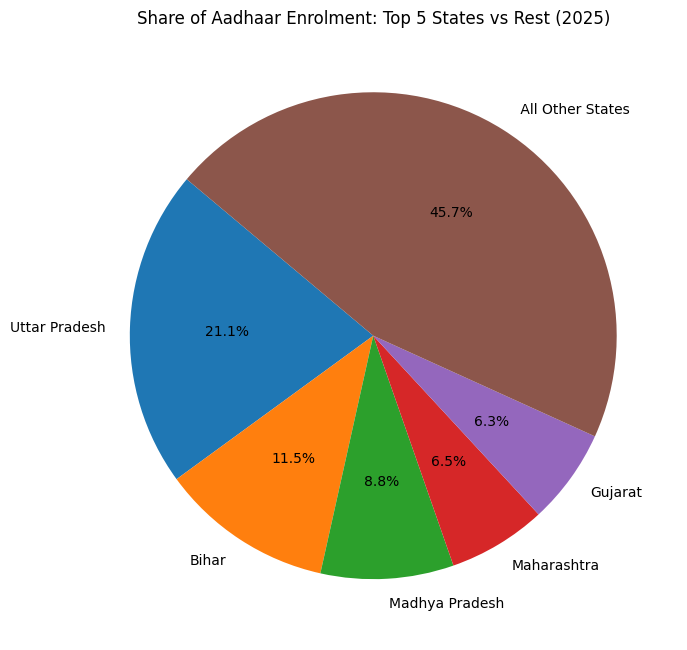

In [425]:
plt.figure(figsize=(7,7))
plt.pie(
    top5['total_enrolment'],
    labels = top5['state'],
    autopct = '%1.1f%%',
    startangle = 140)

plt.title('Share of Aadhaar Enrolment: Top 5 States vs Rest (2025)')
plt.tight_layout()
plt.show()

# **Share of Aadhaar Enrolment (Top 5 States vs Rest of India)**

KEY INSIGHTS:



*   Aadhaar enrolment is highly concentrated in a small number of large states
*   Top 5 states account for a substantial share of total enrolments
*   Remaining states and UTs collectively contribute a smaller portion
*   Highlights the need for differentiated strategies for high‑volume and low‑volume regions



# AGE‑GROUP ANALYSIS

In [426]:
age_state = (df_clean.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index())

In [427]:
age_state['total_enrolment'] = (
    age_state['age_0_5'] +
    age_state['age_5_17'] +
    age_state['age_18_greater'])

age_state['child_share_0_5'] = (
    age_state['age_0_5'] / age_state['total_enrolment'] * 100)


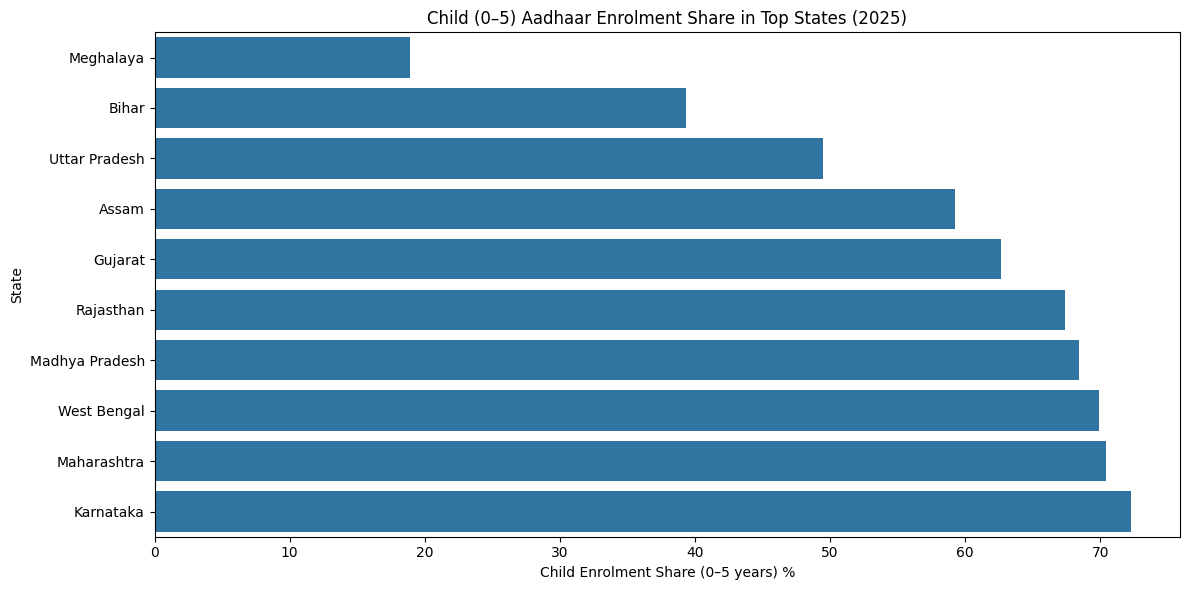

In [428]:
top10_states = statewise.head(10)['state']

age_top10 = age_state[age_state['state'].isin(top10_states)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=age_top10.sort_values('child_share_0_5'),
    x='child_share_0_5',
    y='state')
plt.xlabel('Child Enrolment Share (0–5 years) %')
plt.ylabel('State')
plt.title('Child (0–5) Aadhaar Enrolment Share in Top States (2025)')
plt.tight_layout()
plt.show()


# **Child (0–5) Aadhaar Enrolment Share**

KEY INSIGHTS:
*   Significant variation exists in child enrolment share across high‑enrolment states
*   Southern and western states demonstrate stronger early‑age Aadhaar coverage
*   Some high‑population states show relatively lower child enrolment share
*   Meghalaya and certain northeastern states exhibit uneven child enrolment patterns
*   Early‑age Aadhaar enrolment remains a key opportunity area for improvement



In [429]:
overall_age = df_clean[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

overall_age

,0
age_0_5,1582622
age_5_17,940335
age_18_greater,115026


In [430]:
overall_total = overall_age.sum()
overall_age_percent = (overall_age / overall_total * 100).round(2)
overall_age_percent

,0
age_0_5,59.99
age_5_17,35.65
age_18_greater,4.36


# **Overall Age‑Group Distribution**

KEY INSIGHTS:
*   Children aged 0–5 years account for the largest share (≈60%) of Aadhaar enrolments in 2025
*   The 5–17 age group contributes around 36%, indicating strong enrolment during school‑age years
*   Adult (18+) enrolment forms a very small share (≈4%), suggesting Aadhaar enrolment is largely driven by early‑life registration and updates rather than first‑time adult enrolment
*   The distribution indicates a shift towards early‑age Aadhaar coverage, which supports long‑term inclusion and lifecycle‑based service delivery







In [431]:
age_state['child_share_0_5'] = (age_state['age_0_5'] / age_state['total_enrolment'] * 100)


In [432]:
print(age_state.columns)


Index(['state', 'age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment',
       'child_share_0_5'],
      dtype='object')


In [433]:
# Step 1: Take top 10 states from statewise
top10_states = statewise[['state', 'total_enrolment']].head(10)

# Step 2: Merge child share from age_state
summary_top10 = top10_states.merge(
    age_state[['state', 'child_share_0_5']],
    on='state',
    how='left'
)

# Step 3: Rename & round
summary_top10 = summary_top10.rename(columns={
    'total_enrolment': 'Total Enrolment',
    'child_share_0_5': 'Child (0–5) Share %'
})

summary_top10['Child (0–5) Share %'] = summary_top10['Child (0–5) Share %'].round(2)

summary_top10



,state,Total Enrolment,Child (0–5) Share %
0,Uttar Pradesh,557687,49.45
1,Bihar,302969,39.34
2,Madhya Pradesh,232899,68.42
3,Maharashtra,172465,70.43
4,Gujarat,167099,62.67
5,West Bengal,164867,69.93
6,Rajasthan,154860,67.39
7,Assam,145039,59.21
8,Karnataka,97668,72.28
9,Meghalaya,94116,18.91


# **District Level Analysis(UP)**

In [434]:
up_df = df_clean[df_clean['state']== 'Uttar Pradesh'].copy()

In [435]:
up_district = (up_df.groupby('district')['total_enrolment'].sum().reset_index().sort_values('total_enrolment', ascending = False))

In [436]:
top5_up = up_district.head(25)
bottom5_up = up_district.tail(25)

top5_up, bottom5_up

(               district  total_enrolment
 10             Bahraich            28340
 83              Sitapur            20866
 77         Shahjahanpur            18015
 0                  Agra            17949
 1               Aligarh            17788
 16             Bareilly            17191
 39               Hardoi            16198
 87             Varanasi            14625
 47         Kanpur Nagar            14558
 50                Kheri            14252
 64            Moradabad            14215
 62               Meerut            14126
 71               Rampur            13891
 33            Ghaziabad            13088
 55              Lucknow            12819
 32  Gautam Buddha Nagar            12629
 86                Unnao            11819
 56          Maharajganj            11533
 36            Gorakhpur            10927
 72           Saharanpur            10304
 8              Azamgarh            10011
 66             Pilibhit             9616
 20               Budaun          

In [437]:
up_df['district'] = (up_df['district'].astype(str).str.lower().str.strip().str.replace('*', '', regex = False))

In [438]:
district_corrections_up = {
    # Bhadohi / Sant Ravidas Nagar
    'bhadohi': 'sant ravidas nagar',
    'sant ravidas nagar bhadohi': 'sant ravidas nagar',
    'sant ravidas nagar': 'sant ravidas nagar',

    # Kushinagar
    'kushi nagar': 'kushinagar',
    'kushinagar': 'kushinagar',

    # Maharajganj
    'mahrajganj': 'maharajganj',
    'maharajganj': 'maharajganj',

    # Ayodhya
    'faizabad': 'ayodhya',
    'ayodhya': 'ayodhya',

    # Amroha
    'jyotiba phule nagar': 'amroha',
    'amroha': 'amroha'}


In [439]:
up_df['district'] = up_df['district'].replace(district_corrections_up)


In [440]:
up_df['district'] = up_df['district'].str.title()


In [441]:
up_district = (
    up_df
    .groupby('district')['total_enrolment']
    .sum()
    .reset_index()
    .sort_values('total_enrolment', ascending=False))


In [442]:
top5_up = up_district.head(25)
bottom5_up = up_district.tail(25)

top5_up, bottom5_up


(               district  total_enrolment
 10             Bahraich            28340
 77              Sitapur            20866
 71         Shahjahanpur            18015
 0                  Agra            17949
 1               Aligarh            17788
 16             Bareilly            17191
 37               Hardoi            16198
 81             Varanasi            14625
 44         Kanpur Nagar            14558
 47                Kheri            14252
 59            Moradabad            14215
 57               Meerut            14126
 66               Rampur            13891
 31            Ghaziabad            13088
 51              Lucknow            12819
 30  Gautam Buddha Nagar            12629
 80                Unnao            11819
 52          Maharajganj            11534
 34            Gorakhpur            10927
 67           Saharanpur            10304
 8              Azamgarh            10011
 61             Pilibhit             9616
 19               Budaun          

In [443]:
up_df['district'] = (up_df['district'].astype(str).str.lower().str.strip().str.replace('*', '', regex=False))


In [444]:
district_corrections_up = {
    # Rae Bareli
    'rae bareli': 'raebareli',
    'raebareli': 'raebareli',

    # Shravasti
    'shravasti': 'shravasti',
    'shrawasti': 'shravasti',

    # Sant Ravidas Nagar / Bhadohi
    'bhadohi': 'sant ravidas nagar',
    'sant ravidas nagar': 'sant ravidas nagar',

    # Kushinagar
    'kushi nagar': 'kushinagar',
    'kushinagar': 'kushinagar',

    # Maharajganj
    'mahrajganj': 'maharajganj',
    'maharajganj': 'maharajganj',

    # Ayodhya
    'faizabad': 'ayodhya',
    'ayodhya': 'ayodhya',

    # Amroha
    'jyotiba phule nagar': 'amroha',
    'amroha': 'amroha'
}


In [445]:
up_df['district'] = up_df['district'].replace(district_corrections_up)


In [446]:
up_df['district'] = up_df['district'].str.title()


In [447]:
up_district = (up_df.groupby('district')['total_enrolment'].sum().reset_index().sort_values('total_enrolment', ascending=False))


In [448]:
up_district[up_district['district'].isin(
    ['Rae Bareli', 'Raebareli', 'Shravasti', 'Shrawasti'])]


,district,total_enrolment
71,Shravasti,5228
63,Raebareli,2918


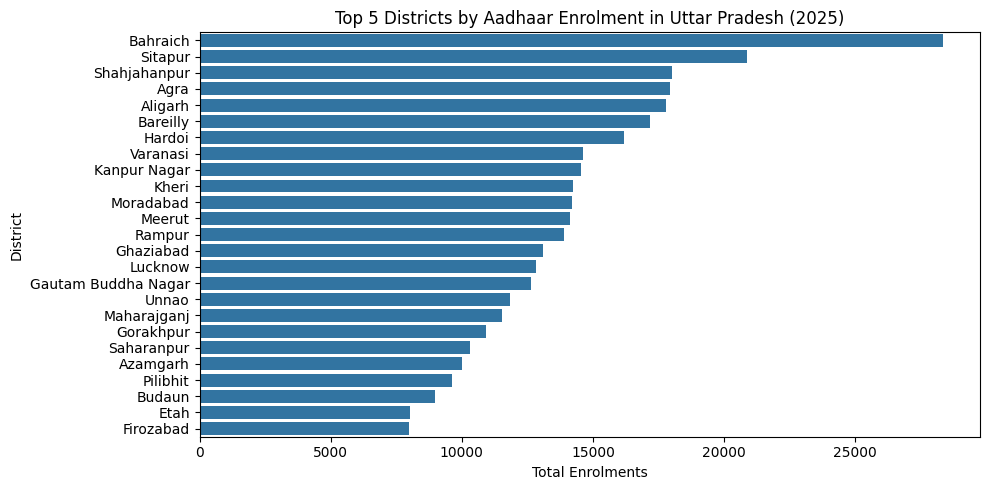

In [449]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top5_up,
    x='total_enrolment',
    y='district'
)
plt.title('Top 5 Districts by Aadhaar Enrolment in Uttar Pradesh (2025)')
plt.xlabel('Total Enrolments')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# **District‑Level Insights**

KEY INSIGHTS(UP):



*   Aadhaar enrolment within Uttar Pradesh is unevenly distributed across districts
*   A small number of districts contribute a disproportionately high share of total enrolments
*   Several districts show very low enrolment volumes, indicating possible access or awareness gaps
*   District‑level variation highlights the importance of targeted operational planning within large states



# **Why this matters:**



*   Aadhaar is critical for access to welfare, education, and healthcare
*   Low child enrolment can delay access to benefits like nutrition schemes
*   Regional disparities indicate where targeted interventions are required

*   Early Aadhaar coverage improves long‑term service delivery efficiency







# **🔹 Recommendations for UIDAI**



*   Launch targeted child enrolment drives in low‑share states
*   Integrate Aadhaar enrolment with birth registration systems
*   Use Anganwadi and school networks for early enrolment
*   Deploy mobile enrolment units in rural and underserved districts
*   Monitor child enrolment as a key KPI alongside total enrolment



# **Conclusion**

This analysis highlights significant regional and age‑wise disparities in Aadhaar enrolment. While overall enrolment is high in populous states, child enrolment remains uneven across regions. Targeted, early‑age enrolment strategies can help UIDAI achieve more inclusive and future‑ready Aadhaar coverage.